<a href="https://colab.research.google.com/github/revanth-15/British-Airways/blob/main/Task_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 1: Web scraping to gain company insights

!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.airlinequality.com/airline-reviews/british-airways"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Example code to collect reviews
reviews = []
for review in soup.find_all('div', class_='text_content'):
    reviews.append(review.get_text(strip=True))

# Save reviews to a CSV
df = pd.DataFrame(reviews, columns=["Review"])
df.to_csv("/content/sample_data/reviews.csv", index=False)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords

# Load data
df = pd.read_csv("/content/sample_data/reviews.csv")

# Remove stopwords, punctuation, and convert to lowercase
stop_words = set(stopwords.words("english"))
df['Cleaned_Review'] = df['Review'].apply(lambda x: ' '.join(
    word.lower() for word in re.findall(r'\w+', x) if word.lower() not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


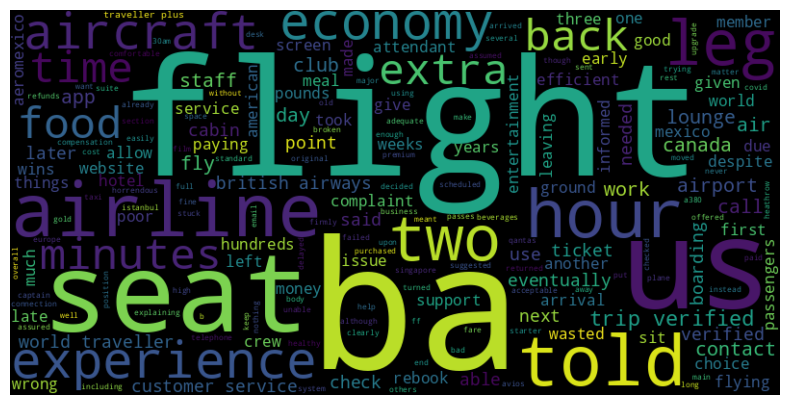

In [ ]:
!pip install matplotlib wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud
text = " ".join(review for review in df.Cleaned_Review)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
